# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes,chunk_clean


### Personal Details

Access information will be stored within an env file

In [2]:
config = configobj.ConfigObj(".env")
host = config["host"]
server_user = config["server_user"]
server_password = config["server_password"]
db_user = config["db_user"]
db_pass = config["db_pass"]


### Setup the client connection to the DB

In [3]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [4]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-10"


In [5]:
result,path=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for 'N' AAPL 2022-01-01 2022-01-10


INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [6]:
trades=pd.read_csv(path)
trades=clean_trades(trades)
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2020-01-02 09:30:00.623737,2020-01-02 09:30:00.624116,N,AAPL,50,296.23,@ I,N,0,20937,4,,0,2020-01-02
2020-01-02 09:30:00.836030,2020-01-02 09:30:00.836409,N,AAPL,22,296.25,@ I,N,0,21461,5,,0,2020-01-02
2020-01-02 09:30:01.073451,2020-01-02 09:30:01.073828,N,AAPL,31,296.26,@ I,N,0,22138,6,,0,2020-01-02
2020-01-02 09:30:01.261133,2020-01-02 09:30:01.261512,N,AAPL,3,296.27,@ I,N,0,22340,7,,0,2020-01-02
2020-01-02 09:30:01.293901,2020-01-02 09:30:01.294279,N,AAPL,31,296.25,@ I,N,0,22448,8,,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09 15:59:54.908801,2020-01-09 15:59:54.909178,N,AAPL,100,309.58,@,N,0,3596804,9103,,0,2020-01-09
2020-01-09 15:59:56.008760,2020-01-09 15:59:56.009140,N,AAPL,100,309.60,@,N,0,3599045,9104,,0,2020-01-09
2020-01-09 15:59:56.126238,2020-01-09 15:59:56.126615,N,AAPL,9,309.58,@ I,N,0,3599260,9105,,0,2020-01-09
2020-01-09 15:59:57.006042,2020-01-09 15:59:57.006420,N,AAPL,100,309.58,@,N,0,3600354,9106,,0,2020-01-09


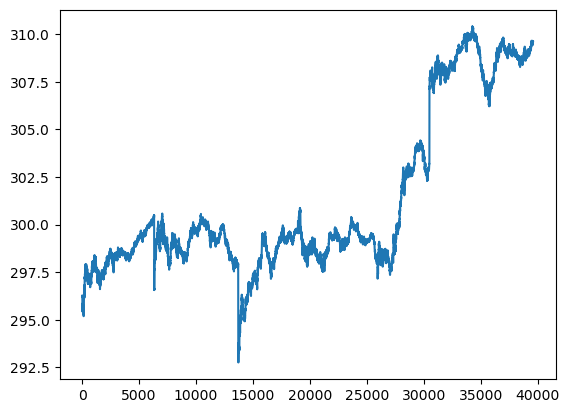

In [7]:
plt.plot(trades['Trade_Price'].values)

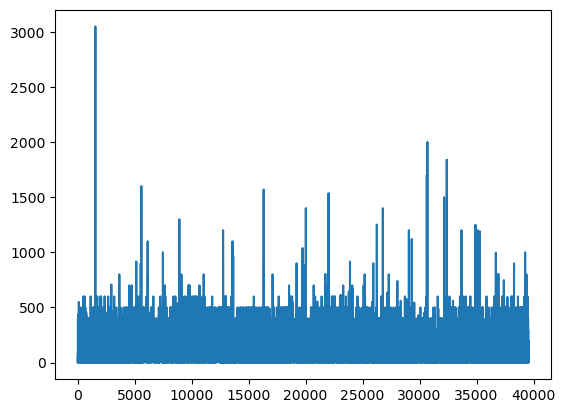

In [8]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [9]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-03"

In [10]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Loop through multiple days without server timeout

This will save the data in a csv file one directory above 

In [11]:
conn.get_quotes_range(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Quote Query for 'N' AAPL 2022-01-01 2022-01-02


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)
/home/jbohne/sbu/taq_db/TAQ-Query-Scripts/scripts/query_helpers.py:90: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  day_quotes = pd.read_csv(f"data/raw_data/{symbol}_quotes.csv")


Saved Quotes for AAPL on 2022-01-01 00:00:00
Quote Query for 'N' AAPL 2022-01-02 2022-01-03


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(
/home/jbohne/sbu/taq_db/TAQ-Query-Scripts/scripts/query_helpers.py:90: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  day_quotes = pd.read_csv(f"data/raw_data/{symbol}_quotes.csv")
INFO:paramiko.transport.sftp:[chan 1] sftp session closed.


Saved Quotes for AAPL on 2022-01-02 00:00:00


### Chunk Clean Large Dataframes

This cleans quote data from a given path directory; dropping the cleaned files there 

In [13]:
chunk_clean('data/raw_data/AAPL_quotes_2022-01-01')

/home/jbohne/sbu/taq_db/TAQ-Query-Scripts/scripts/preprocess.py:90: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in pd.read_csv(f"{path}.csv", iterator=True, chunksize=100000):


100000 rows cleaned
200000 rows cleaned
300000 rows cleaned


/home/jbohne/sbu/taq_db/TAQ-Query-Scripts/scripts/preprocess.py:90: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in pd.read_csv(f"{path}.csv", iterator=True, chunksize=100000):


400000 rows cleaned
500000 rows cleaned


In [14]:
quotes=pd.read_csv('data/raw_data/AAPL_quotes_2022-01-01.csv')
quotes

/tmp/ipykernel_4226/2917167753.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  quotes=pd.read_csv('data/raw_data/AAPL_quotes_2022-01-01.csv')


,Unnamed: 0,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,...,Best_Offer_Size,Best_Offer_FINRA_Market_Maker_ID,LULD_Indicator,LULD_NBBO_Indicator,SIP_Generated_Message_Identifier,Participant_Timestamp,FINRA_ADF_Timestamp,Security_Status_Indicator,Quote_Cancel_Correction,National_BBO_Ind
0,0,2021-01-04 07:33:26.817111,N,AAPL,133.87,1.0,0.00,0.0,R,361495,...,1.0,NaN,NaN,NaN,NaN,73326816748800,NaN,,NaN,2
1,1,2021-01-04 08:05:52.559381,N,AAPL,134.04,1.0,0.00,0.0,R,493941,...,14.0,NaN,NaN,NaN,NaN,80552559016448,NaN,,NaN,2
2,2,2021-01-04 08:10:54.021149,N,AAPL,133.28,1.0,0.00,0.0,R,522838,...,2.0,NaN,NaN,NaN,NaN,81054020786432,NaN,,NaN,2
3,3,2021-01-04 08:11:35.818610,N,AAPL,133.25,1.0,0.00,0.0,R,525826,...,5.0,NaN,NaN,NaN,NaN,81135818244864,NaN,,NaN,2
4,4,2021-01-04 09:20:20.168058,N,AAPL,132.70,1.0,140.81,1.0,R,1054405,...,2.0,NaN,NaN,NaN,NaN,92020167694592,NaN,,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436121,436121,2021-01-29 15:59:56.860614,N,AAPL,131.76,1.0,131.80,2.0,R,94002963,...,6.0,NaN,NaN,A,NaN,155956860244736,NaN,,NaN,2
436122,436122,2021-01-29 15:59:57.203654,N,AAPL,131.76,1.0,131.81,2.0,R,94010126,...,5.0,NaN,NaN,A,NaN,155957203285248,NaN,,NaN,2
436123,436123,2021-01-29 15:59:57.404627,N,AAPL,131.76,1.0,131.78,1.0,R,94014140,...,1.0,NaN,NaN,A,NaN,155957404260352,NaN,,NaN,2
436124,436124,2021-01-29 15:59:57.404674,N,AAPL,131.76,1.0,131.82,1.0,R,94014141,...,6.0,NaN,NaN,A,NaN,155957404304640,NaN,,NaN,2


In [7]:
print(quotes.columns)

Index(['Unnamed: 0', 'Time', 'Exchange', 'Symbol', 'Bid_Price', 'Bid_Size',
       'Offer_Price', 'Offer_Size', 'Quote_Condition', 'Sequence_Number',
       'FINRA_BBO_Indicator', 'Source_Of_Quote', 'Best_Bid_Exchange',
       'Best_Bid_Price', 'Best_Bid_Size', 'Best_Bid_FINRA_Market_Maker_ID',
       'Best_Offer_Exchange', 'Best_Offer_Price', 'Best_Offer_Size',
       'Best_Offer_FINRA_Market_Maker_ID', 'LULD_Indicator',
       'LULD_NBBO_Indicator', 'SIP_Generated_Message_Identifier',
       'Participant_Timestamp', 'FINRA_ADF_Timestamp',
       'Security_Status_Indicator', 'Quote_Cancel_Correction',
       'National_BBO_Ind'],
      dtype='object')
